In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = '../DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [4]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [5]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [6]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [7]:
# cek missing value
df.isnull().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

In [8]:
# Duplicated
df.duplicated().sum()

14342

In [9]:
# Cek data NaN
df.isna().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

## Prepocessing

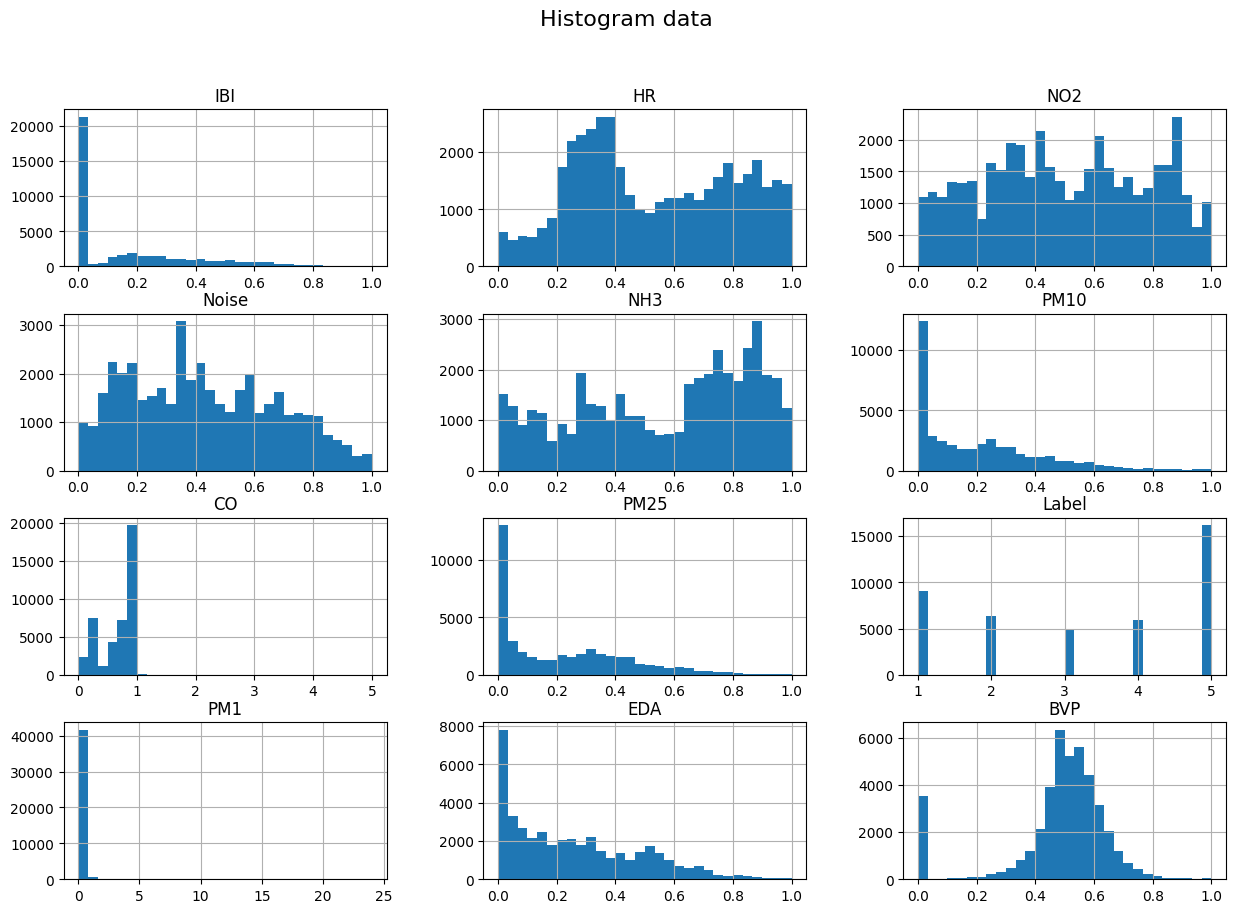

In [10]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram data", fontsize=16)
plt.show()

In [11]:
df.shape

(42436, 12)

/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_3984/3045415140.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


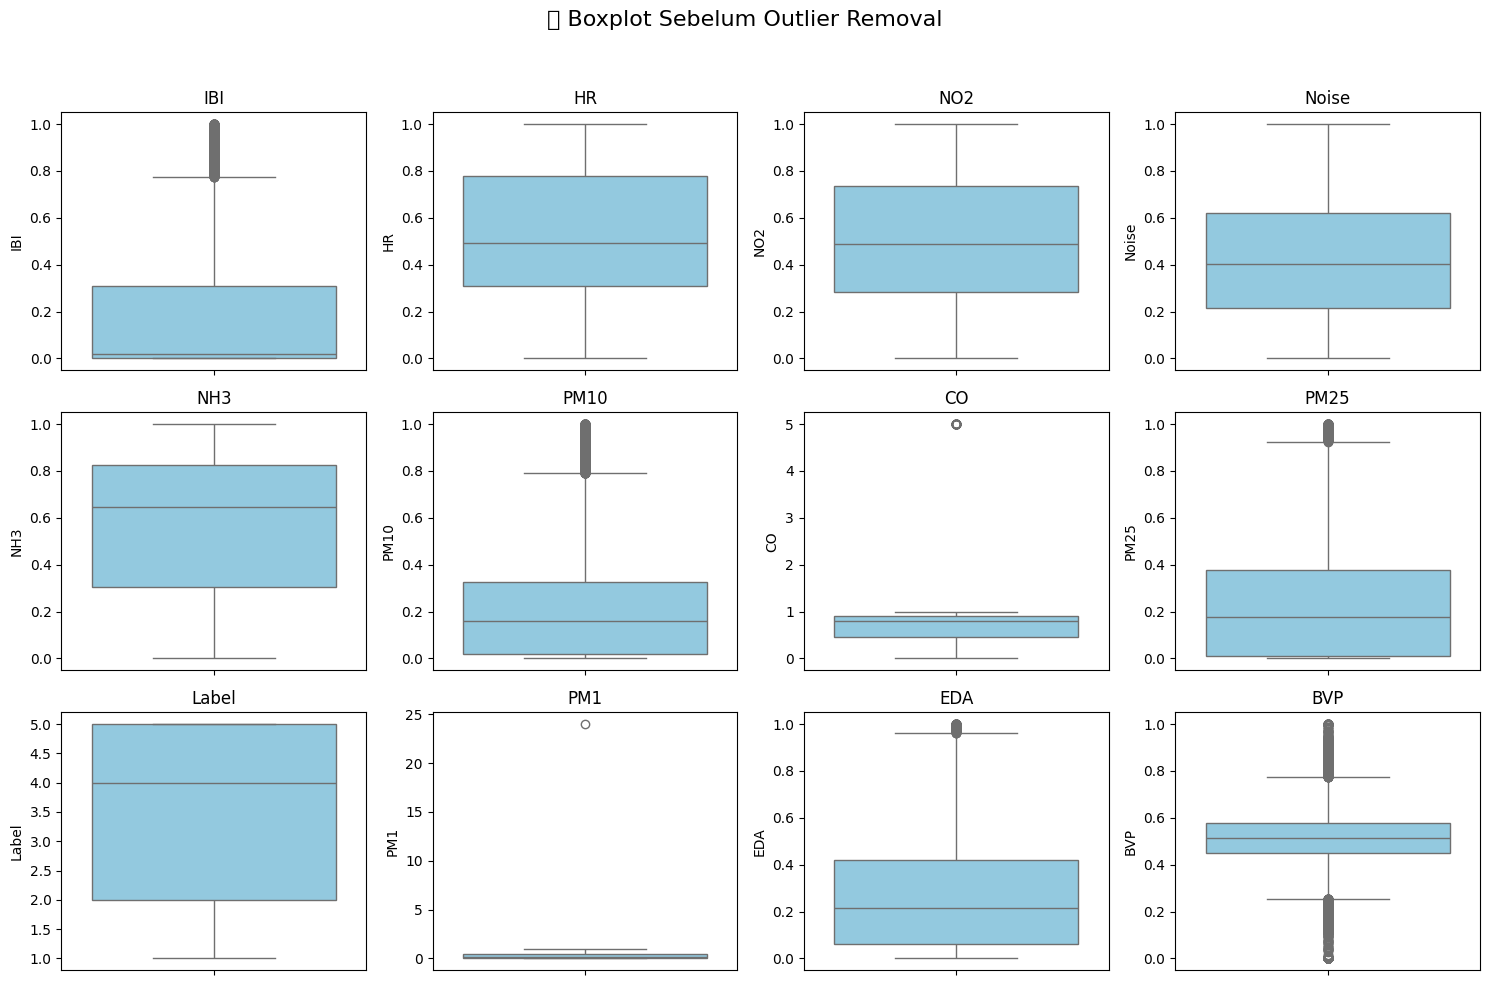

In [12]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grid layout otomatis sesuai jumlah kolom
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # supaya bisa diiterasi

for i, col in enumerate(df.columns):
    sns.boxplot(y=df_before_outlier[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col}")

# Hapus axis kosong kalau jumlah kolom tidak pas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📊 Boxplot Sebelum Outlier Removal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [13]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [14]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (41189, 12)



📊 Boxplot Setelah Outlier Removal


/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_3984/230769811.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


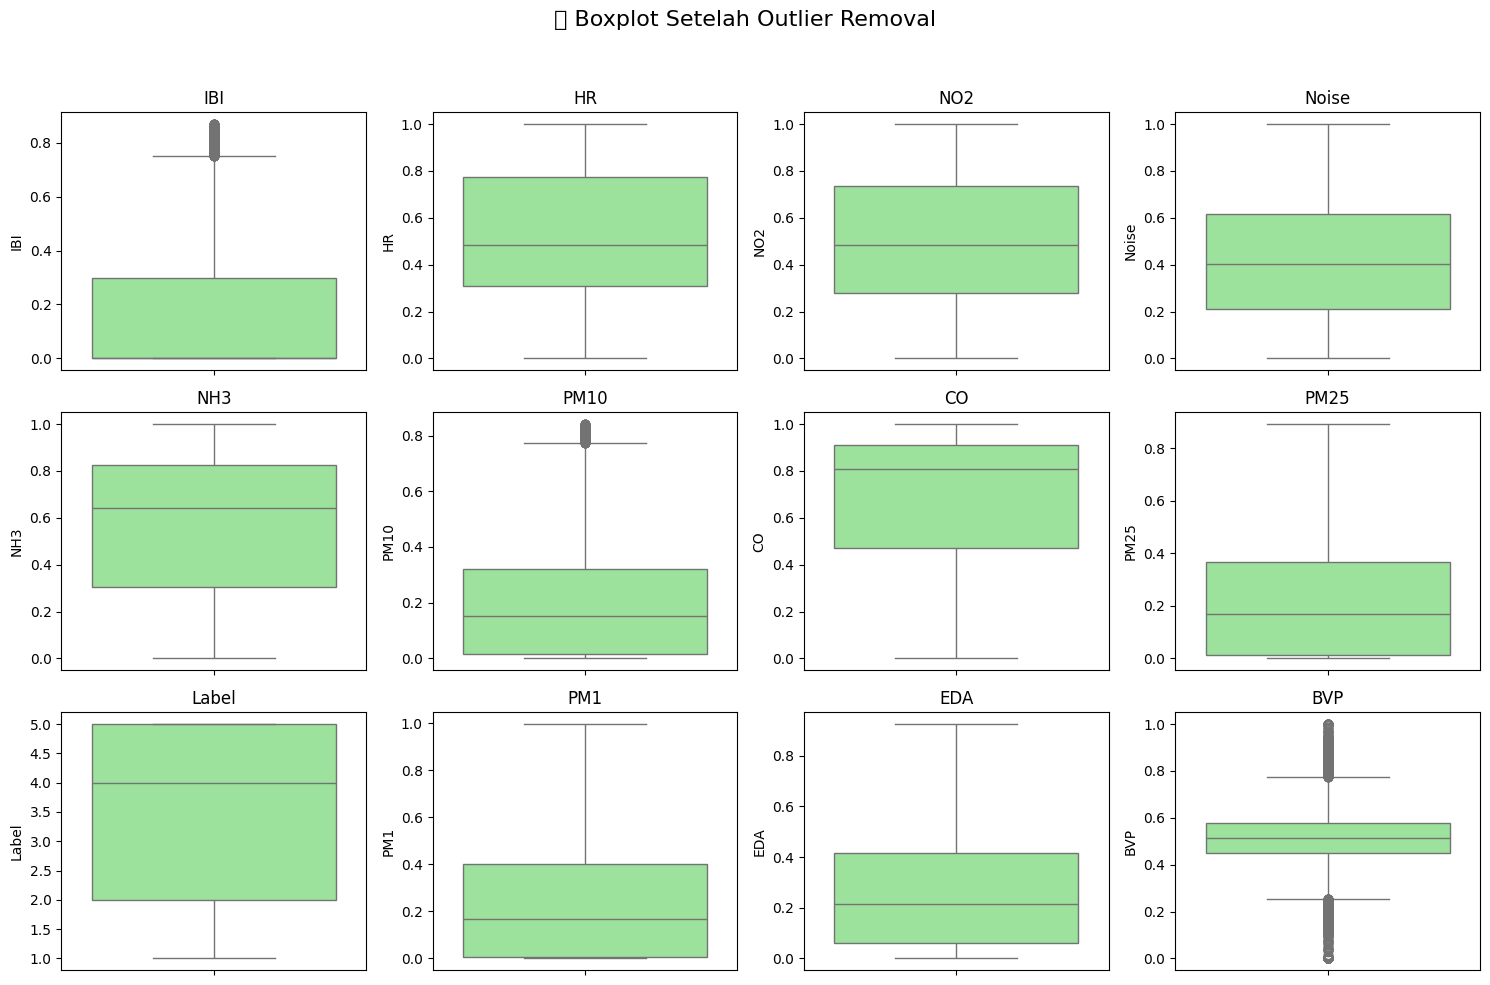

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Boxplot Setelah Outlier Removal")

# Tentukan layout grid
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop setiap kolom dan pasang boxplot ke grid
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong kalau jumlah kolom tidak pas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
fig.suptitle("📊 Boxplot Setelah Outlier Removal", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


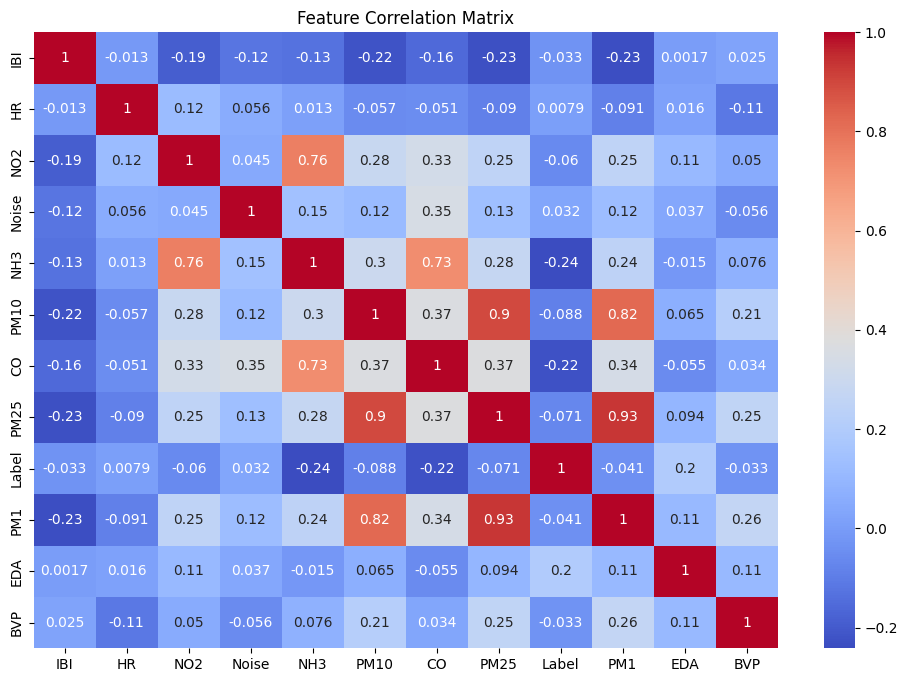

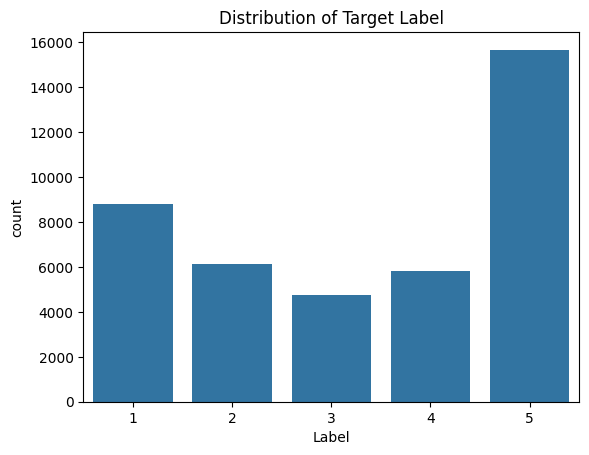

In [16]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [17]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (41189, 11)
Shape of target (y): (41189,)


In [18]:
print(X.info())
print(y.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 41189 entries, 0 to 42435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     41189 non-null  float64
 1   HR      41189 non-null  float64
 2   NO2     41189 non-null  float64
 3   Noise   41189 non-null  float64
 4   NH3     41189 non-null  float64
 5   PM10    41189 non-null  float64
 6   CO      41189 non-null  float64
 7   PM25    41189 non-null  float64
 8   PM1     41189 non-null  float64
 9   EDA     41189 non-null  float64
 10  BVP     41189 non-null  float64
dtypes: float64(11)
memory usage: 3.8 MB
None
Label
5    15671
1     8805
2     6137
4     5835
3     4741
Name: count, dtype: int64


In [19]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Inisialisasi oversampler
ros = RandomOverSampler(random_state=42)

# Lakukan oversampling
X_balanced, y_balanced = ros.fit_resample(X, y)

# Cek hasil
print(f"Shape X_balanced: {X_balanced.shape}")
print("Distribusi label setelah oversampling:")
print(pd.Series(y_balanced).value_counts())


Shape X_balanced: (78355, 11)
Distribusi label setelah oversampling:
Label
5    15671
4    15671
3    15671
2    15671
1    15671
Name: count, dtype: int64


In [20]:
X_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78355 entries, 0 to 78354
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     78355 non-null  float64
 1   HR      78355 non-null  float64
 2   NO2     78355 non-null  float64
 3   Noise   78355 non-null  float64
 4   NH3     78355 non-null  float64
 5   PM10    78355 non-null  float64
 6   CO      78355 non-null  float64
 7   PM25    78355 non-null  float64
 8   PM1     78355 non-null  float64
 9   EDA     78355 non-null  float64
 10  BVP     78355 non-null  float64
dtypes: float64(11)
memory usage: 6.6 MB


## Prepocessing

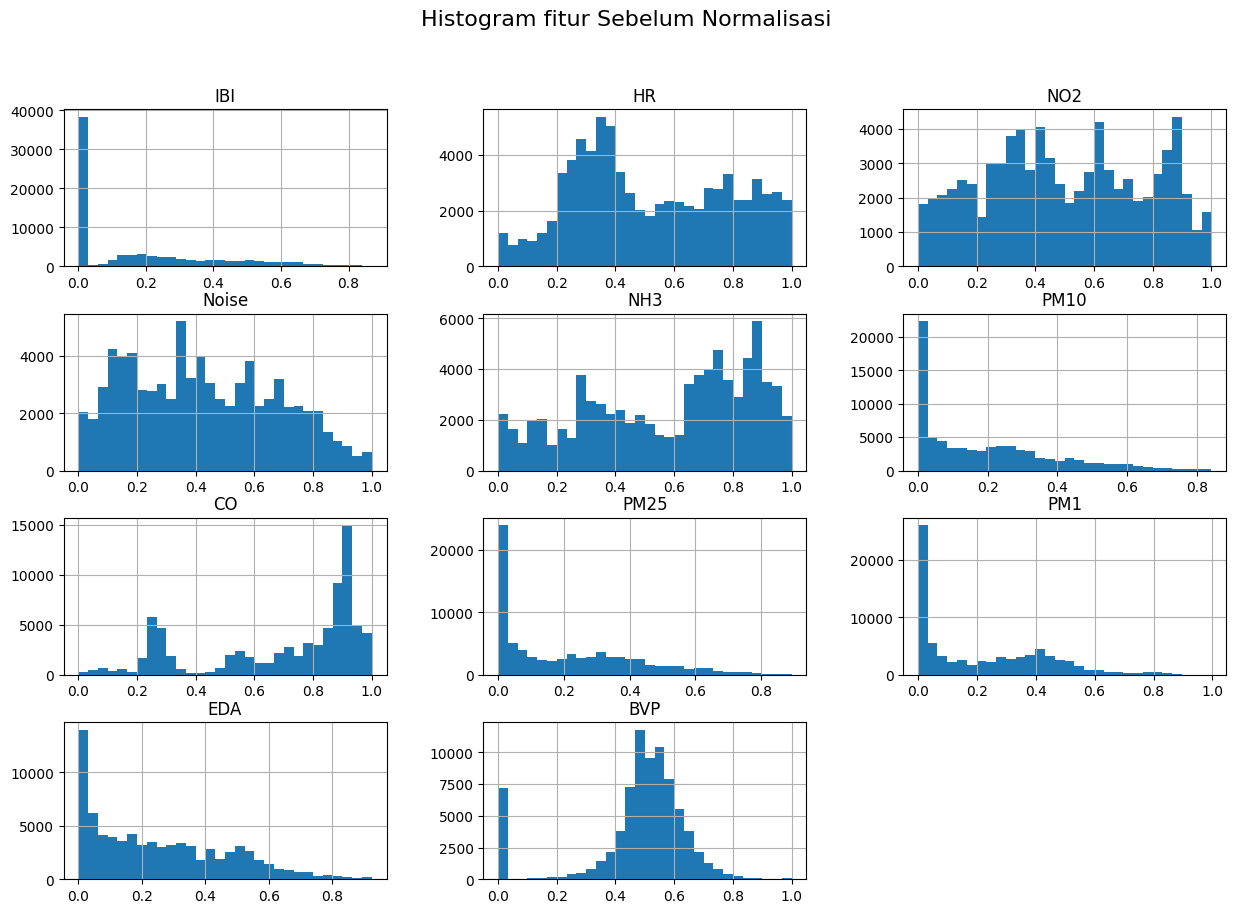

In [21]:
# Histogram sebelum normalisasi
X_balanced.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram fitur Sebelum Normalisasi", fontsize=16)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
# Split data menjadi 80% data train dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [23]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (62684, 11)
Data Test after normalisation = (15671, 11)


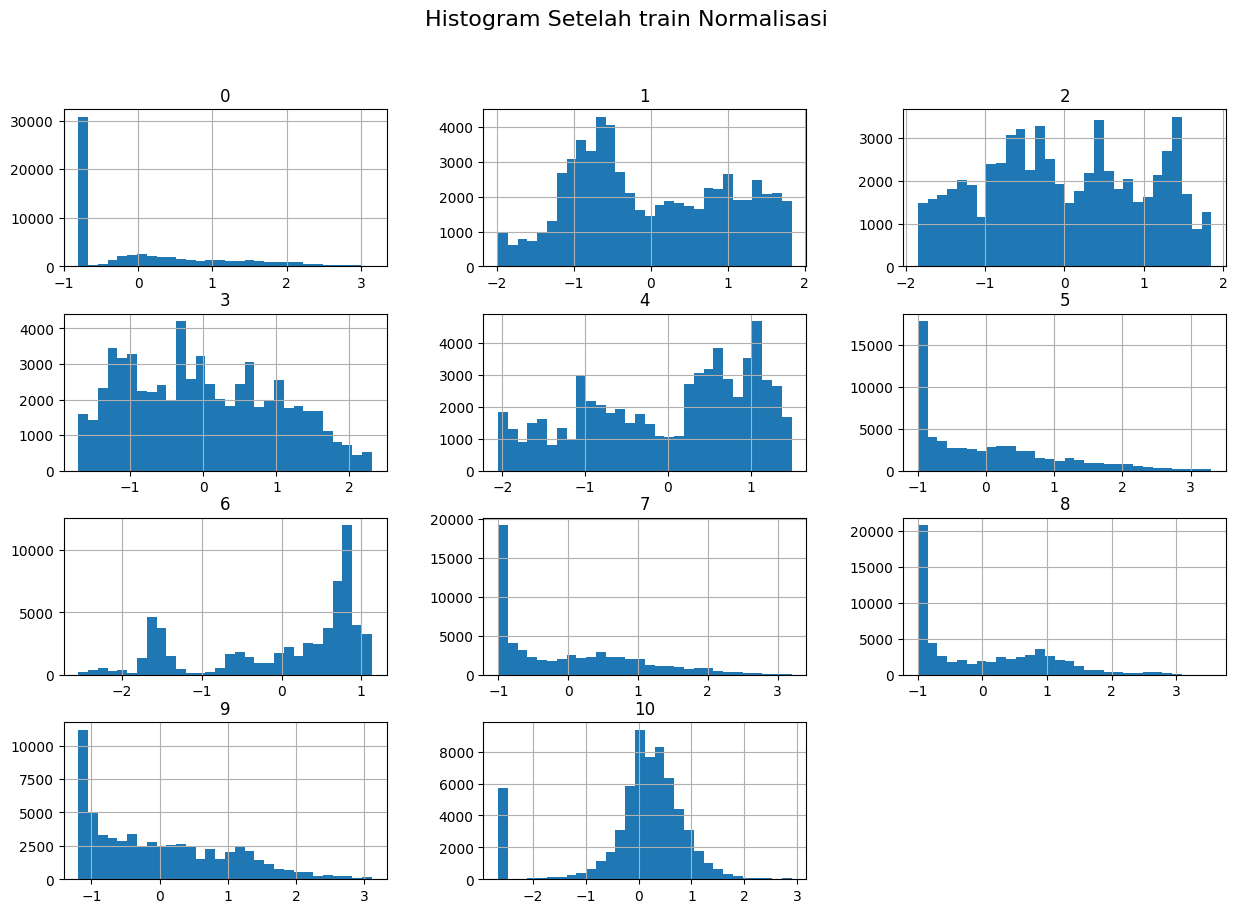

In [24]:
# Histogram setelah normalisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah train Normalisasi", fontsize=16)
plt.show()

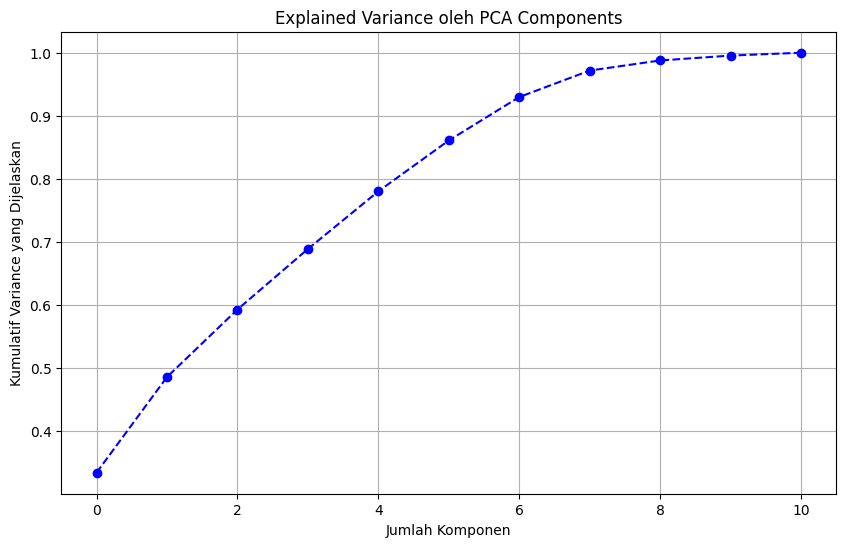

In [25]:
# Inisialisasi PCA tanpa mengurangi dimensi dulu (hanya untuk melihat explained variance)
pca = PCA(n_components=None) # Set n_components to None to keep all components initially
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh PCA Components')
plt.grid(True)
plt.show()

In [26]:
# Tampilkan variansi kumulatif
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponen ke-{i+1}: {var:.4f} variance terjelaskan")

# Misal ingin menyimpan komponen yang menjelaskan >=90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n🔍 Jumlah komponen optimal (≥90% variance): {n_components}")

Komponen ke-1: 0.3338 variance terjelaskan
Komponen ke-2: 0.4855 variance terjelaskan
Komponen ke-3: 0.5927 variance terjelaskan
Komponen ke-4: 0.6886 variance terjelaskan
Komponen ke-5: 0.7801 variance terjelaskan
Komponen ke-6: 0.8608 variance terjelaskan
Komponen ke-7: 0.9297 variance terjelaskan
Komponen ke-8: 0.9717 variance terjelaskan
Komponen ke-9: 0.9877 variance terjelaskan
Komponen ke-10: 0.9954 variance terjelaskan
Komponen ke-11: 1.0000 variance terjelaskan

🔍 Jumlah komponen optimal (≥90% variance): 7


In [27]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62684, 7)
Shape test PCA: (15671, 7)


## Training Data

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_ann(X_train, X_test, y_train, y_test, percobaan="ANN_Full", output_file="results_ann.csv", epochs=30, batch_size=32):
    input_dim = X_train.shape[1]  # jumlah fitur

    # Normalisasi label supaya mulai dari 0
    unique_labels = np.unique(np.concatenate([y_train, y_test]))
    label_mapping = {old: new for new, old in enumerate(unique_labels)}
    y_train = np.array([label_mapping[y] for y in y_train])
    y_test = np.array([label_mapping[y] for y in y_test])

    n_classes = len(unique_labels)  # jumlah kelas sebenarnya
    
    # Definisi model ANN
    model = Sequential([
        Dense(128, activation="relu", input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation="relu"),
        Dropout(0.3),
        Dense(n_classes, activation="softmax")  # output sesuai jumlah kelas
    ])
    
    # Kompilasi model
    model.compile(optimizer="adam", 
                  loss="sparse_categorical_crossentropy", 
                  metrics=["accuracy"])
    
    # Training
    history = model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test),
                        epochs=epochs, 
                        batch_size=batch_size,
                        verbose=1)
    
    # Evaluasi
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1)
    
    report = classification_report(y_test, y_pred_classes, output_dict=True)
    
    # Simpan hasil ke dataframe
    df_results = pd.DataFrame([{
        "Percobaan": percobaan,
        "Model": "ANN",
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }])
    
    print("\n📊 Hasil Evaluasi ANN:")
    print(df_results)
    
    # Simpan ke CSV (append kalau sudah ada)
    try:
        existing = pd.read_csv(output_file)
        df_results = pd.concat([existing, df_results], ignore_index=True)
    except FileNotFoundError:
        pass
    df_results.to_csv(output_file, index=False)
    
    # Plot loss & akurasi
    plt.figure(figsize=(12,5))
    
    # Akurasi
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label="Train Acc")
    plt.plot(history.history["val_accuracy"], label="Val Acc")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.show()
    
    return df_results, model


Epoch 1/50
3918/3918 [==============================] - 3s 755us/step - loss: 1.2512 - accuracy: 0.4983 - val_loss: 1.0373 - val_accuracy: 0.6108
Epoch 2/50
3918/3918 [==============================] - 3s 740us/step - loss: 1.0503 - accuracy: 0.5931 - val_loss: 0.9030 - val_accuracy: 0.6794
Epoch 3/50
3918/3918 [==============================] - 3s 735us/step - loss: 0.9598 - accuracy: 0.6325 - val_loss: 0.8193 - val_accuracy: 0.6959
Epoch 4/50
3918/3918 [==============================] - 3s 738us/step - loss: 0.8986 - accuracy: 0.6566 - val_loss: 0.7473 - val_accuracy: 0.7283
Epoch 5/50
3918/3918 [==============================] - 3s 745us/step - loss: 0.8539 - accuracy: 0.6730 - val_loss: 0.7144 - val_accuracy: 0.7460
Epoch 6/50
3918/3918 [==============================] - 3s 721us/step - loss: 0.8269 - accuracy: 0.6865 - val_loss: 0.6817 - val_accuracy: 0.7615
Epoch 7/50
3918/3918 [==============================] - 3s 735us/step - loss: 0.8003 - accuracy: 0.6960 - val_loss: 0.6501 -

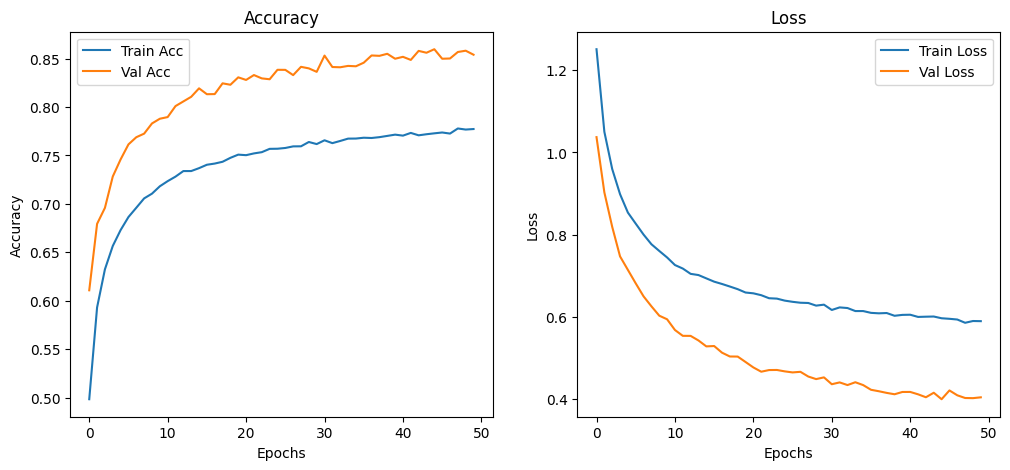

In [29]:
# Panggil fungsi evaluasi ANN
df_results, model = evaluate_ann(
    X_train, X_test, y_train, y_test,
    percobaan="ANN Percobaan baseline randomoversampling",  # bebas isi nama percobaan
    output_file="results_ann.csv", # file penyimpanan
    epochs=50,    # jumlah epoch
    batch_size=16 # ukuran batch
)


Epoch 1/50
3918/3918 [==============================] - 3s 765us/step - loss: 1.1594 - accuracy: 0.5413 - val_loss: 0.9052 - val_accuracy: 0.6614
Epoch 2/50
3918/3918 [==============================] - 3s 731us/step - loss: 0.9549 - accuracy: 0.6363 - val_loss: 0.7682 - val_accuracy: 0.7302
Epoch 3/50
3918/3918 [==============================] - 3s 744us/step - loss: 0.8637 - accuracy: 0.6746 - val_loss: 0.6879 - val_accuracy: 0.7673
Epoch 4/50
3918/3918 [==============================] - 3s 728us/step - loss: 0.8152 - accuracy: 0.6934 - val_loss: 0.6343 - val_accuracy: 0.7865
Epoch 5/50
3918/3918 [==============================] - 3s 737us/step - loss: 0.7732 - accuracy: 0.7092 - val_loss: 0.5992 - val_accuracy: 0.8022
Epoch 6/50
3918/3918 [==============================] - 3s 731us/step - loss: 0.7465 - accuracy: 0.7191 - val_loss: 0.5584 - val_accuracy: 0.8092
Epoch 7/50
3918/3918 [==============================] - 3s 738us/step - loss: 0.7172 - accuracy: 0.7299 - val_loss: 0.5462 -

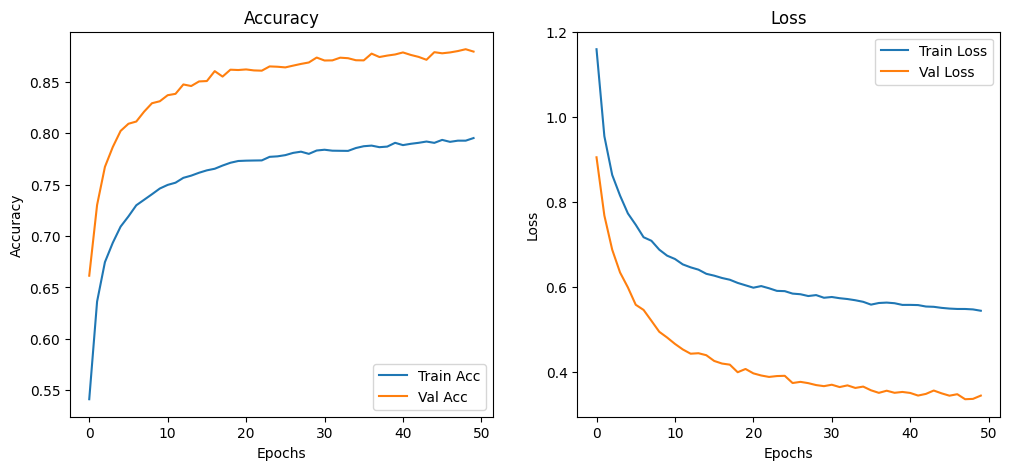

In [30]:
# Panggil fungsi evaluasi ANN
df_results, model = evaluate_ann(
    X_train_scaled, X_test_scaled, y_train, y_test,
    percobaan="ANN Percobaan normalisasi randomoversampling",  # bebas isi nama percobaan
    output_file="results_ann.csv", # file penyimpanan
    epochs=50,    # jumlah epoch
    batch_size=16 # ukuran batch
)


In [31]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62684, 7)
Shape test PCA: (15671, 7)


Epoch 1/50
3918/3918 [==============================] - 3s 720us/step - loss: 1.2015 - accuracy: 0.5244 - val_loss: 0.9957 - val_accuracy: 0.6149
Epoch 2/50
3918/3918 [==============================] - 3s 706us/step - loss: 1.0428 - accuracy: 0.5907 - val_loss: 0.8863 - val_accuracy: 0.6647
Epoch 3/50
3918/3918 [==============================] - 3s 707us/step - loss: 0.9729 - accuracy: 0.6213 - val_loss: 0.8196 - val_accuracy: 0.6899
Epoch 4/50
3918/3918 [==============================] - 3s 717us/step - loss: 0.9223 - accuracy: 0.6412 - val_loss: 0.7761 - val_accuracy: 0.7118
Epoch 5/50
3918/3918 [==============================] - 3s 707us/step - loss: 0.8909 - accuracy: 0.6552 - val_loss: 0.7405 - val_accuracy: 0.7214
Epoch 6/50
3918/3918 [==============================] - 3s 716us/step - loss: 0.8655 - accuracy: 0.6648 - val_loss: 0.7069 - val_accuracy: 0.7390
Epoch 7/50
3918/3918 [==============================] - 3s 705us/step - loss: 0.8490 - accuracy: 0.6731 - val_loss: 0.6865 -

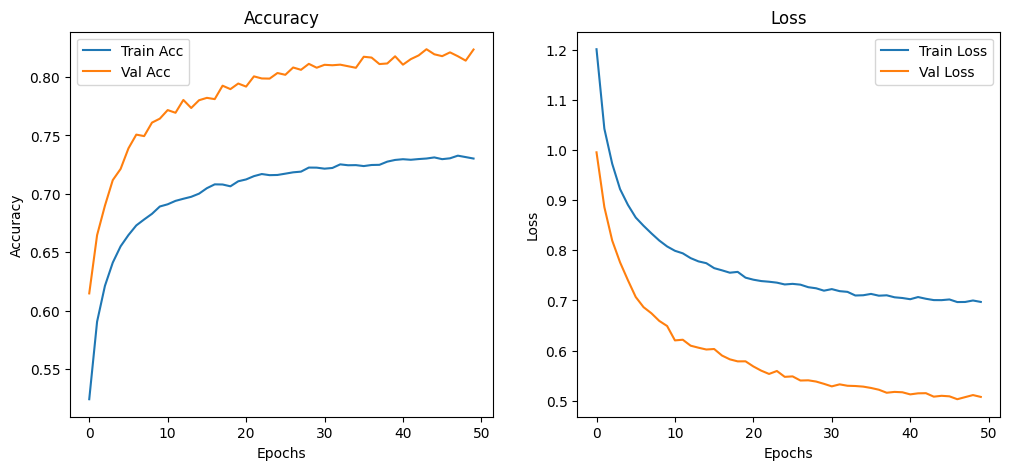

In [32]:
# Panggil fungsi evaluasi ANN
df_results, model = evaluate_ann(
    X_train_pca, X_test_pca, y_train, y_test,
    percobaan="ANN Percobaan pca 7 randomoversampling",  # bebas isi nama percobaan
    output_file="results_ann.csv", # file penyimpanan
    epochs=50,    # jumlah epoch
    batch_size=16 # ukuran batch
)


In [33]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=6)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62684, 6)
Shape test PCA: (15671, 6)


Epoch 1/50
3918/3918 [==============================] - 3s 773us/step - loss: 1.2322 - accuracy: 0.5063 - val_loss: 1.0486 - val_accuracy: 0.5782
Epoch 2/50
3918/3918 [==============================] - 3s 741us/step - loss: 1.0888 - accuracy: 0.5676 - val_loss: 0.9469 - val_accuracy: 0.6330
Epoch 3/50
3918/3918 [==============================] - 3s 758us/step - loss: 1.0178 - accuracy: 0.5941 - val_loss: 0.8792 - val_accuracy: 0.6643
Epoch 4/50
3918/3918 [==============================] - 3s 745us/step - loss: 0.9790 - accuracy: 0.6132 - val_loss: 0.8306 - val_accuracy: 0.6869
Epoch 5/50
3918/3918 [==============================] - 3s 760us/step - loss: 0.9470 - accuracy: 0.6267 - val_loss: 0.8016 - val_accuracy: 0.6989
Epoch 6/50
3918/3918 [==============================] - 3s 745us/step - loss: 0.9257 - accuracy: 0.6365 - val_loss: 0.7801 - val_accuracy: 0.7064
Epoch 7/50
3918/3918 [==============================] - 3s 758us/step - loss: 0.9055 - accuracy: 0.6474 - val_loss: 0.7532 -

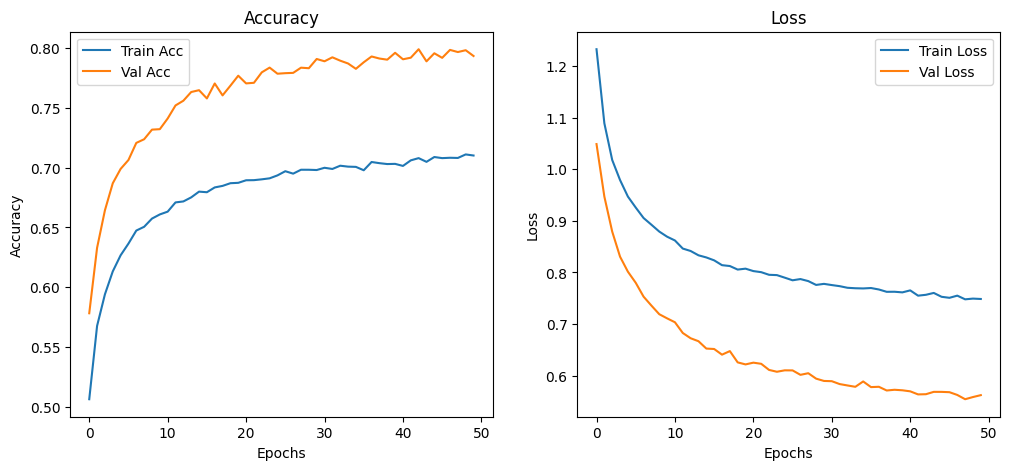

In [34]:
# Panggil fungsi evaluasi ANN
df_results, model = evaluate_ann(
    X_train_pca, X_test_pca, y_train, y_test,
    percobaan="ANN Percobaan pca 6 randomoversampling",  # bebas isi nama percobaan
    output_file="results_ann.csv", # file penyimpanan
    epochs=50,    # jumlah epoch
    batch_size=16 # ukuran batch
)


In [35]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=5)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62684, 5)
Shape test PCA: (15671, 5)


Epoch 1/50
3918/3918 [==============================] - 4s 936us/step - loss: 1.2771 - accuracy: 0.4784 - val_loss: 1.1170 - val_accuracy: 0.5577
Epoch 2/50
3918/3918 [==============================] - 3s 794us/step - loss: 1.1514 - accuracy: 0.5388 - val_loss: 1.0313 - val_accuracy: 0.5966
Epoch 3/50
3918/3918 [==============================] - 3s 723us/step - loss: 1.0967 - accuracy: 0.5635 - val_loss: 0.9796 - val_accuracy: 0.6120
Epoch 4/50
3918/3918 [==============================] - 3s 735us/step - loss: 1.0586 - accuracy: 0.5774 - val_loss: 0.9337 - val_accuracy: 0.6360
Epoch 5/50
3918/3918 [==============================] - 3s 722us/step - loss: 1.0314 - accuracy: 0.5891 - val_loss: 0.9067 - val_accuracy: 0.6481
Epoch 6/50
3918/3918 [==============================] - 3s 733us/step - loss: 1.0139 - accuracy: 0.5984 - val_loss: 0.8868 - val_accuracy: 0.6578
Epoch 7/50
3918/3918 [==============================] - 3s 716us/step - loss: 0.9972 - accuracy: 0.6057 - val_loss: 0.8602 -

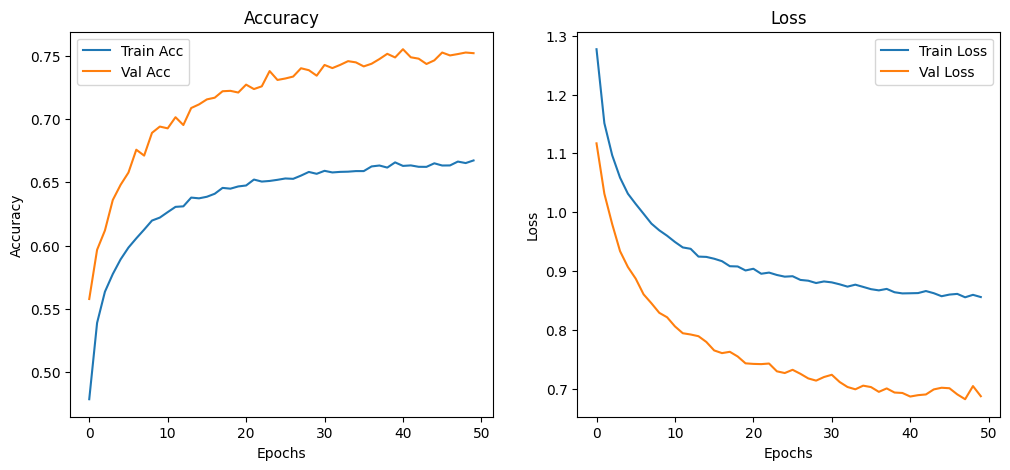

In [36]:
# Panggil fungsi evaluasi ANN
df_results, model = evaluate_ann(
    X_train_pca, X_test_pca, y_train, y_test,
    percobaan="ANN Percobaan pca 5 randomoversampling",  # bebas isi nama percobaan
    output_file="results_ann.csv", # file penyimpanan
    epochs=50,    # jumlah epoch
    batch_size=16 # ukuran batch
)
